# Hands-on session 1: Neo basics

These exercises cover the basics introduced in Tutorial 1

## Preparation: Download public ephys dataset
On Linux you can download the publicly available dataset via the command below. On other systems, please download the files manually from [l101210-001.ns2](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns2), [l101210-001.nev](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.nev) and [l101210-001.ns5](https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns5) and save them in the same folder as this notebook.


In [1]:
!wget -O l101210-001.ns2 https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns2
!wget -O l101210-001.nev https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.nev
!wget -O l101210-001.ns5 https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns5

--2021-08-24 21:51:53--  https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.ns2
Resolving gin.g-node.org (gin.g-node.org)... 141.84.41.219
Connecting to gin.g-node.org (gin.g-node.org)|141.84.41.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43748 (43K) [application/octet-stream]
Saving to: 'l101210-001.ns2’

l101210-001.ns2     100%[===================>]  42,72K  --.-KB/s    in 0,1s    

2021-08-24 21:51:59 (327 KB/s) - 'l101210-001.ns2’ saved [43748/43748]

--2021-08-24 21:51:59--  https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/raw/master/blackrock/blackrock_2_1/l101210-001.nev
Resolving gin.g-node.org (gin.g-node.org)... 141.84.41.219
Connecting to gin.g-node.org (gin.g-node.org)|141.84.41.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1483616 (1,4M) [application/octet-stream]
Saving to: 'l101210-001.nev’

l101210-001.nev     100%[===================>]   1,41M  


## Exercise 1: Exploring an ephys dataset

1. Load the dataset you just downloaded with Neo. Which IO seems suitable for this dataset?
2. How many continuous recording parts (segments) does this dataset contain?
3. How many channels were recorded in this dataset and at what sampling rates?
4. How many spiketrains does this dataset contain?

### Your solution

In [1]:
import neo
io = neo.io.BlackrockIO('l101210-001')
block = io.read_block()

print(f'Number of segments: {len(block.segments)}')
for anasig in block.segments[0].analogsignals:
    print(f'Number of channels with sampling rate {anasig.sampling_rate}: {anasig.shape[-1]}')
print(f'Number of spiketrains: {len(block.segments[0].spiketrains)}')

Number of segments: 1
Number of channels with sampling rate 1000.0 Hz: 6
Number of channels with sampling rate 30000.0 Hz: 96
Number of spiketrains: 218


## Exercise 2: Extracting data for visualization
1. Visualize the channels 10 to 19 of the `AnalogSignal` with the highest temporal resolution. 
2. Add axis labels, title and legend based on metadata provided by the `AnalogSignal`. Check the `array_annotations` to label each channel.

### Your solution

Text(0.5, 1.0, 'nsx5')

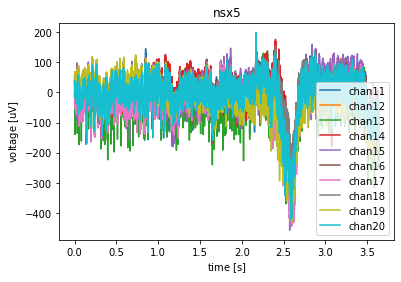

In [69]:
import matplotlib.pyplot as plt
# identify analogsignal with 30kHz temporal resolution
anasig = block.segments[0].analogsignals[1]
fig = plt.figure()
ax = plt.gca()
ax.plot(anasig.times, anasig.magnitude[:,10:20])

ax.set_ylabel(f'voltage [{anasig.units.dimensionality.latex}]')
ax.set_xlabel(f'time [{anasig.times.dimensionality.latex}]')
ax.legend(anasig.array_annotations['channel_names'][10:20], loc='best')
ax.set_title(anasig.name)

## Exercise 3: Saving the dataset using NIX
- Save the complete dataset in a new file named `l101210-001.nix`
- What is the size of the resulting nix file?

### Your solution

In [66]:
filename = 'l101210-001.nix'
with neo.io.NixIO(filename, 'ow') as io:
    io.write_block(block)

In [67]:
ls -lh l101210-001.nix

-rw-rw-r-- 1 sprengerj sprengerj 47M août  25 10:42 l101210-001.nix


## Bonus Exercise
Did you bring your own data? Check if your format is supported by Neo and load your data!